**Author: Binqian 'Eric' Zeng**

**Date: 12/12/2018**

**Email: bz866@nyu.edu**

**Phone: (929)208-7103**

**Note:**

This notebook is for exploring NYC Green Taxi trips data from September 2015. All analysis are finished in Python 3.6 with open-source libraries. Requirements for the environment are in listed in the README.txt file under the main directory. 

**Data Science Challenge from Capital One: Trips!**

The coding challenge is designed to test your skill and intuition about real world data. For the challenge, we will use data collected by the New York City Taxi and Limousine commission about "Green" taxis. Green Taxis(as opposed to yellow ones) are taxi that are not allowed to pick up passengers inside of the densely populated areas of Mahattan. We will use the data from September 2015. We are using NYC Taxi and Limousine trip record data: 
(http://www.nyc.gov/html/tlc/html/about/trip_record_data.shtml). Data dictionary is at http://www.nyc.gov/html/tlc/downloads/pdf/data_dictionary_trip_records_green.pdf

# Question 1

## Load Data 

In [1]:
#Libraries
import os
import numpy as np
import pandas as pd

In [2]:
#LOAD DATA
if os.path.exists("./green_tripdata_2015-09.csv"): #Read the dataset if downloaded
    raw = pd.read_csv("./green_tripdata_2015-09.csv", sep=',', delim_whitespace=False)
else: #Download the dataset if not downloaded
    url = "https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2015-09.csv"
    raw = pd.read_csv(url, sep=',', delim_whitespace=False)
    
data = raw # use raw as the variable to store the backup

## Data Description

In [3]:
print("Number of rows {}.\n Number of columns {}. \n".format(data.shape[0], data.shape[1]))

Number of rows 1494926.
 Number of columns 21. 



In [4]:
data.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979485,40.684956,-73.979431,40.685020,1,...,7.8,0.0,0.0,1.95,0.0,NaN,0.0,9.75,1,2.0
1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010796,40.912216,-74.010780,40.912212,1,...,45.0,0.0,0.0,0.00,0.0,NaN,0.0,45.00,1,2.0
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921410,40.766708,-73.914413,40.764687,1,...,4.0,0.5,0.5,0.50,0.0,NaN,0.3,5.80,1,1.0
3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.921387,40.766678,-73.931427,40.771584,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0
4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482,40.714046,-73.944412,40.714729,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0


# Question 2

## The histogram of the number of the trip distance ("Trip Distance")

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats

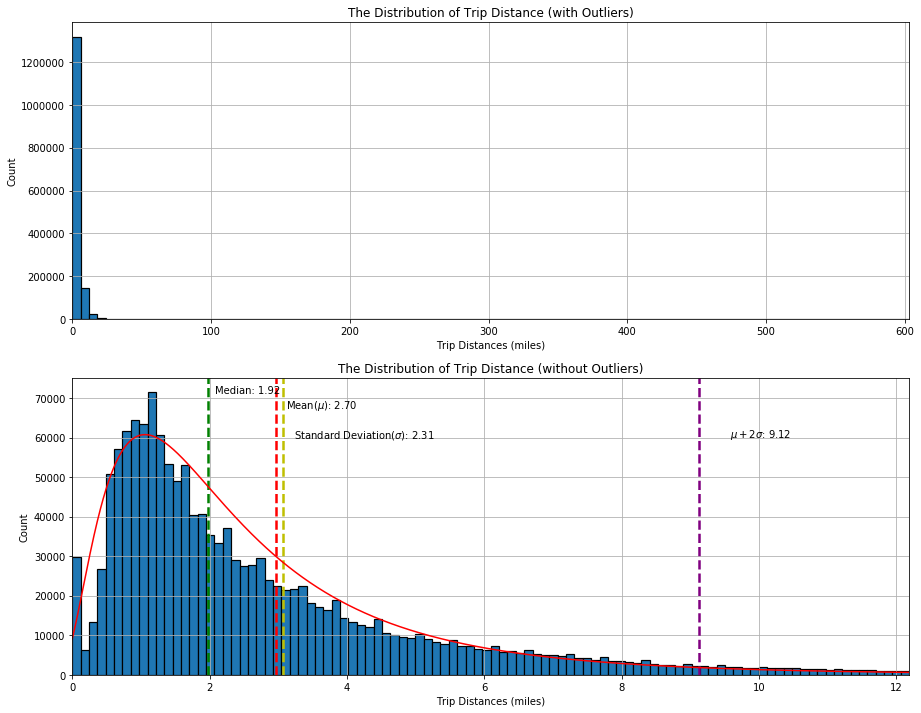

In [6]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharey=False)
ax1, ax2 = ax.flatten()
fig.set_size_inches(15,12)

# the distribution of trip distances with outliers
#plot
data.Trip_distance.hist(bins=100, edgecolor='black', linewidth=1.2, ax=ax1)
ax1.set_title("The Distribution of Trip Distance (with Outliers)")
ax1.set_xlabel("Trip Distances (miles)")
ax1.set_ylabel("Count")
ax1.set_xlim(0, data.Trip_distance.max()) #Trip Distances can not be negative, set X axis range limits

# The distribution of trip distances without outliers
raw_trip_distance = data.Trip_distance
# Outliers are defined: distance > mean + 3*std
outliers_def = raw_trip_distance > raw_trip_distance.mean() + 3 * raw_trip_distance.std()
trip_distance_no_outliers = raw_trip_distance[~(outliers_def)]
#plot
hist_trip = trip_distance_no_outliers.hist(bins=100, 
                                           edgecolor='black', 
                                           linewidth=1.2, 
                                           ax=ax2)
ax2.set_title("The Distribution of Trip Distance (without Outliers)")
ax2.set_xlabel("Trip Distances (miles)")
ax2.set_ylabel("Count")
ax2.set_xlim(0, trip_distance_no_outliers.max())

# Draw Median, Mean, std, mean + 2 sigma trip distance line
min_, max_ = ax2.get_ylim()
# mean
ax2.axvline(raw_trip_distance.mean(), color='r', linestyle='dashed', linewidth=2.5)
ax2.text(raw_trip_distance.mean() + raw_trip_distance.mean()/20, 
         max_ - max_/10, 
         'Mean($\mu$): {:.2f}'.format(trip_distance_no_outliers.mean()))
# Median 
ax2.axvline(raw_trip_distance.median(), color='g', linestyle='dashed', linewidth=2.5)
ax2.text(raw_trip_distance.median() + raw_trip_distance.median()/20, 
         max_ - max_/20, 
         'Median: {:.2f}'.format(trip_distance_no_outliers.median()))
# Standard Deviation
ax2.axvline(raw_trip_distance.std(), color='y', linestyle='dashed', linewidth=2.5)
ax2.text(raw_trip_distance.std() + raw_trip_distance.std()/20, 
         max_ - max_/5, 
         'Standard Deviation($\sigma$): {:.2f}'.format(trip_distance_no_outliers.std()))
# mean + 2 * sigma
mean_2std = raw_trip_distance.mean() + 2*raw_trip_distance.std()
ax2.axvline(mean_2std, color='purple', linestyle='dashed', linewidth=2.5)
ax2.text(mean_2std + mean_2std/20, 
         max_ - max_/5, 
         '$\mu + 2\sigma$: {:.2f}'.format(mean_2std))

# Fit Lognormal Distribution to trip distances without outliers
# Ref: https://stackoverflow.com/questions/32507117/fitting-and-plotting-lognormal
x_fit = np.linspace(trip_distance_no_outliers.min(),trip_distance_no_outliers.max(),len(trip_distance_no_outliers))
shape, loc, scale = stats.lognorm.fit(trip_distance_no_outliers.values) 
#Gives the PDF
pdf_fitted = stats.lognorm.pdf(x_fit, shape, loc, scale)
line_lognorm = ax2.plot(x_fit, 200000*pdf_fitted, 'r')

plt.show()

## Report any structure you find and any hypotheses you have about that structure

**Note:**

- For visualization, the second figure firstly exclude outliers which are defined as $distances > \mu + 3\sigma$

- Trip distances are asymmetrically distributed. The distribution of trip distances is postively skewed. The median of the distribution is smaller than its mean and both the median and the mean are smaller than the standard deviation. 

- Trip distances can not be negative. 

- Intuitively, the distribution of trip distances is a **lognormal distribution**(https://en.wikipedia.org/wiki/Log-normal_distribution)

- If the distribution of trip distances is a lognormal distribution, it has the property that if the random variable $X$ is log-normally distributed, then $ln(X)$ has a normal distribution

- The code for fitting the lognormal distribution is referenced from https://stackoverflow.com/questions/32507117/fitting-and-plotting-lognormal

**Hypothesis:**

- Trip distances reflect motivations and purposes of taking green taxis

# Question 3

## Report mean and median trip distance grouped by hour of day

In [7]:
import datetime as dt

In [14]:
def datetime_str_as_HMS(series):
    """Convert Y-M-D H-M-S string datetime as H-M-S dt.datetime.hour
    @Input: a series of df, datetime as string
    @Output: a series of df, datetime as (%Y-%m-%d %H:%M:%S)
    
    Ex:
    '2015-09-01 00:02:34' -> datetime(2015-09-01 00:02:34)"""
    
    return series.apply(lambda x: dt.datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))

def stats_desc_col_groupby_another_col(df, target_col_name, groupby_col_name, stats_desc):
    """Return desired stats description of a series groupby another series given a dataframe
    Input:
    @df: dataframe
    @target_col_name: str, the column name of the target column
    @groupby_col_name: str, the column name of the groupby column
    @stats_desc: str; a choice of {'mean', 'median', 'std'}
    
    Output:
    @series"""
    
    if stats_desc == "mean":
        return df[[target_col_name, groupby_col_name]].groupby(groupby_col_name).mean()
    if stats_desc == "median":
        return df[[target_col_name, groupby_col_name]].groupby(groupby_col_name).median()
    if stats_desc == "std":
        return df[[target_col_name, groupby_col_name]].groupby(groupby_col_name).std()


In [9]:
# format datetime
data.lpep_pickup_datetime = datetime_str_as_HMS(data.lpep_pickup_datetime)
data.Lpep_dropoff_datetime = datetime_str_as_HMS(data.Lpep_dropoff_datetime)
# Augment columns with datetime hours
data['pickup_hr'] = data.lpep_pickup_datetime.apply(lambda x: x.hour)
data['dropoff_hr'] = data.Lpep_dropoff_datetime.apply(lambda x: x.hour)

In [15]:
#Mean trip distance group by hour
mean_trip_dis_grpby_pickup_hr = stats_desc_col_groupby_another_col(data, 
                                                            "Trip_distance", 
                                                            "pickup_hr", 
                                                            'mean')
mean_trip_dis_grpby_dropoff_hr = stats_desc_col_groupby_another_col(data, 
                                                            "Trip_distance", 
                                                            "dropoff_hr", 
                                                            'mean')
# Median trip distance group by hour
median_trip_dis_grpby_pickup_hr = stats_desc_col_groupby_another_col(data, 
                                                            "Trip_distance", 
                                                            "pickup_hr", 
                                                            'median')
median_trip_dis_grpby_dropoff_hr = stats_desc_col_groupby_another_col(data, 
                                                            "Trip_distance", 
                                                            "dropoff_hr", 
                                                            'median')


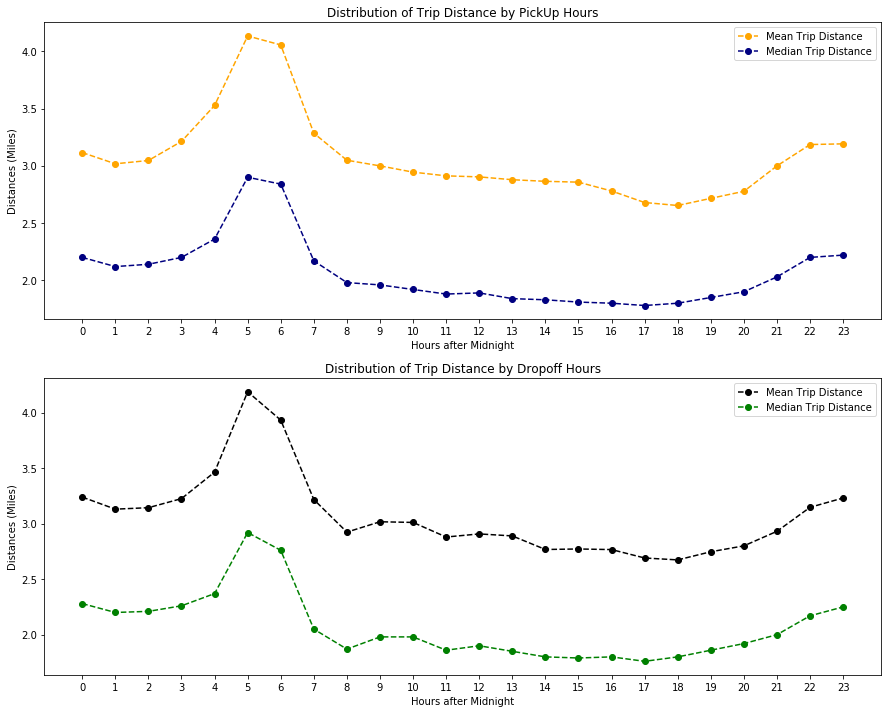

In [46]:
# plot
hours = range(0,24,1)

fig, ax = plt.subplots(nrows=2, ncols=1, sharey=False)
ax1, ax2 = ax.flatten()
fig.set_size_inches(15,12)

ax1.plot(hours, mean_trip_dis_grpby_pickup_hr,"--o--", lw=1.5, color="orange", label='Mean Trip Distance')
ax1.plot(hours, median_trip_dis_grpby_pickup_hr, "--o--", lw=1.5, color="navy", label='Median Trip Distance')
ax1.set_title("Distribution of Trip Distance by PickUp Hours")
ax1.set_xlabel("Hours after Midnight")
ax1.set_ylabel("Distances (Miles)")
ax1.legend(loc='upper right')
ax1.set_xticks(hours)

ax2.plot(hours, mean_trip_dis_grpby_dropoff_hr,"--o--", lw=1.5, color="black", label='Mean Trip Distance')
ax2.plot(hours, median_trip_dis_grpby_dropoff_hr, "--o--", lw=1.5, color="green", label='Median Trip Distance')
ax2.set_title("Distribution of Trip Distance by Dropoff Hours")
ax2.set_xlabel("Hours after Midnight")
ax2.set_ylabel("Distances (Miles)")
ax2.legend(loc='upper right')
ax2.set_xticks(hours)

plt.show()

**Note:**

- Trips at late night(22:00 - 5:00 am) have higher average trip distances than trips in daytime ( 8:00 am - 20:00). <br>

**Reasons**

**1) the operation hour of subway express trains **

**2) traffic situation in the city.**

Express trains stop at 9:00 pm or 11:00 pm and re-start to run in the early morning. Without express trains, people need to wait local trains with 20 to 30 minutes intervals and stop at all stations along the way. Besides, traffic is smooth in NYC at late night. People may choose taxi instead of local trains to go to somewhere far. Taking taxi with smooth traffic doesn't cost a high rate. As far as I know, taking taxi from downtown Mahattan to Washington Heights costs 35 bucks. 


## Characteristics of trips that originate or terminate at one of the NYC area airports

**Note:**

Based on the data dictionary of NYC taxi data (http://www.nyc.gov/html/tlc/downloads/pdf/data_dictionary_trip_records_green.pdf):

- **RateCodeID** indicates if the trip ends in a airport. <br>
1= Standard rate
2=JFK
3=Newark
4=Nassau or Westchester
5=Negotiated fare
6=Group ride 

In [87]:
# Remove outliers records
# Outliers are defined: distance > mean + 3*std
outliers_def = data.Trip_distance > data.Trip_distance.mean() + 3 * data.Trip_distance.std()
data_no_outliers = data[~(outliers_def)]
data_no_outliers['Trip_Duration'] = data_no_outliers.dropoff_hr - data_no_outliers.pickup_hr

/Users/erictseng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [88]:
# Trips from/to Airport 
airport_trip_data = data_no_outliers[(data_no_outliers.RateCodeID==2) | (data_no_outliers.RateCodeID==3)]
# Trips not from/to Airport endings 
nonairport_trip_data = data_no_outliers[~(data_no_outliers.index.isin(airport_trip_data.index))]
print("Number of trips that end in airports: {}".format(airport_trip_data.shape[0]))

Number of trips that end in airports: 2654


#### Fare

In [89]:
print("average fare of trips from/end airports is: {}".format(airport_trip_data.Fare_amount.mean()))
print("average fare of trips not from/end airports is: {}".format(nonairport_trip_data.Fare_amount.mean()))


average fare of trips from/end airports is: 40.44819140919367
average fare of trips not from/end airports is: 11.769400272028923


#### Trip Duration

In [93]:
airport_trip_data['Trip_Duration'] = airport_trip_data.Lpep_dropoff_datetime- airport_trip_data.lpep_pickup_datetime
nonairport_trip_data['Trip_Duration'] = nonairport_trip_data.Lpep_dropoff_datetime - nonairport_trip_data.lpep_pickup_datetime


/Users/erictseng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/erictseng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


TypeError: Cannot cast ufunc less input from dtype('float64') to dtype('<m8[ns]') with casting rule 'same_kind'

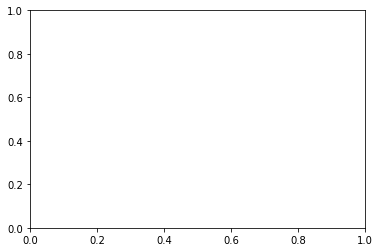

In [94]:
airport_trip_data.Trip_Duration.hist()

In [67]:
data_no_outliers

dtype('<M8[ns]')